## Observations and Insights 

In [ ]:
### 3 observations:
# 1: The correlation between mouse weight and tumor volume is pretty strong as
# The correlation coefficient between mice weight and tumor volume is 0.84 

# 2: For mice s185 the Capomulin treatment was efficient as the tumor volume reduced with time.

# 3: The split between male Vs. female is almost equal. 51% male Vs. 49% female

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [16]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [17]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [18]:
merge_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [19]:
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_by = merge_df.groupby(["Mouse ID", "Timepoint"])

In [23]:
group_by.count()

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   
...                          ...  ...         ...         ...   
z969     25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
         40                    1    1           1           1   
         45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1  
...                                ...               ...  
z969     25                          1                 1  
         30                          1                 1  
         35                          1                 1  
         40                          1                 1  
         45                          1                 1  

[1888 rows x 6 columns]

In [24]:
### Lets find which mouse have duplicate Timepoint

In [25]:
count=merge_df.count()

In [26]:
count.sort_values(["Timepoint"], ascending=False)

TypeError: unhashable type: 'list'

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 



In [28]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [29]:
merge_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [31]:
new_merge_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)

In [32]:
new_merge_df.loc[new_merge_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [33]:
new_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
clean_df=merge_df[merge_df["Mouse ID"]!="g989"]

In [35]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [37]:
groups = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

In [38]:
mean=groups.mean()

In [39]:
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [40]:
var=groups.var()

In [41]:
var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [42]:
std=groups.std()

In [43]:
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [44]:
median=groups.median()

In [45]:
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [46]:
sem=groups.sem()

In [47]:
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [48]:
tumor_stat_df=pd.DataFrame({"mean": mean, "median": median, "var": var, "std": std, "sem": sem})

In [49]:
tumor_stat_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [50]:
groups.agg(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [ ]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the total
#number of measurements taken for each treatment regimen throughout the course of the study.



In [51]:
measurement = clean_df[["Mouse ID", "Drug Regimen"]]

In [52]:
measurement.head()

,Mouse ID,Drug Regimen
0,k403,Ramicane
1,k403,Ramicane
2,k403,Ramicane
3,k403,Ramicane
4,k403,Ramicane


In [53]:
count_measurement=measurement.groupby("Drug Regimen")

In [54]:
count_measurement.count()

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [55]:
type(count_measurement.count())

pandas.core.frame.DataFrame

In [ ]:
# Using Pandas

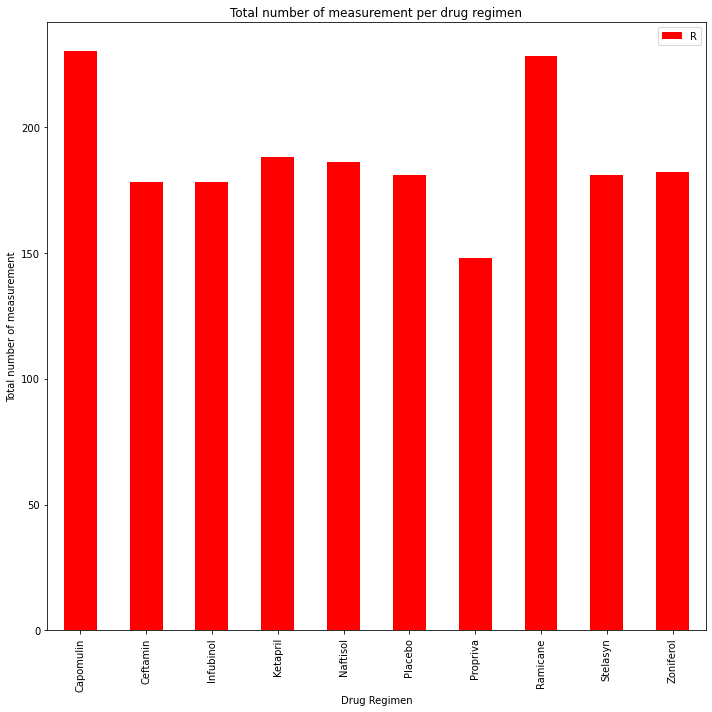

In [56]:
bar=count_measurement.count().plot(kind="bar", figsize=(10,10), color="red")
bar.set_ylabel("Total number of measurement")
bar.set_title("Total number of measurement per drug regimen")
plt.legend("Regimen count")
plt.tight_layout()

In [ ]:
#Using Pyplot

In [ ]:
# Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that
# shows the distribution of female or male mice in the study.

In [ ]:
# Using pandas

In [57]:
gender = clean_df[["Sex", "Mouse ID"]]

In [58]:
gender_count = gender.groupby("Sex")

In [59]:
gender_count.count()

,Mouse ID
Sex,
Female,922
Male,958


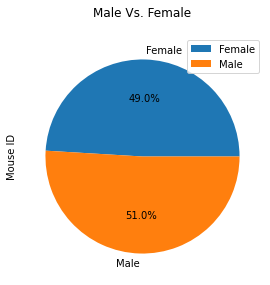

In [60]:
pie = gender_count.count().plot(kind="pie", subplots=True, autopct="%1.1f%%", title="Male Vs. Female")
plt.tight_layout()

In [ ]:
#Using Pyplot

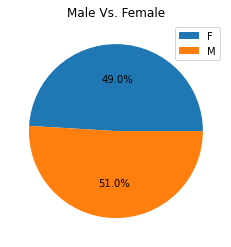

In [61]:
plt.pie(gender_count.count()["Mouse ID"], autopct="%1.1f%%")
plt.title("Male Vs. Female")
plt.legend("FM")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [62]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
tumor_volume_df = clean_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

In [64]:
tumor_volume_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729


In [65]:
fav_regimen = tumor_volume_df.loc[(tumor_volume_df["Drug Regimen"] == "Capomulin") | 
                                 (tumor_volume_df["Drug Regimen"] == "Ramicane") |
                                 (tumor_volume_df["Drug Regimen"] == "Infubinol") |
                                 (tumor_volume_df["Drug Regimen"] == "Ceftamin")]
fav_regimen

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1868,z581,Infubinol,25,54.316407
1869,z581,Infubinol,30,56.286750
1870,z581,Infubinol,35,58.628399
1871,z581,Infubinol,40,60.053740


In [66]:
fav_regimen_last_time = fav_regimen.loc[fav_regimen["Timepoint"] == 45]

In [67]:
fav_regimen_last_time

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [68]:
fav_regimen_last_time["Mouse ID"].nunique()

63

In [69]:
groupby_fav_regimen_last_time = fav_regimen_last_time.groupby("Drug Regimen")

In [70]:
groupby_fav_regimen_last_time.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
59,s508,Ramicane,45,30.276232
74,m546,Ramicane,45,30.564625
84,z578,Ramicane,45,30.638696
104,u364,Capomulin,45,31.023923
124,y793,Capomulin,45,31.896238


In [85]:
quartiles = groupby_fav_regimen_last_time["Tumor Volume (mm3)"].quantile([.25,.5,.75])

In [86]:
quartiles

Drug Regimen      
Capomulin     0.25    32.377357
              0.50    37.311846
              0.75    40.159220
Ceftamin      0.25    61.433892
              0.50    64.299830
              0.75    67.527482
Infubinol     0.25    62.754451
              0.50    66.083066
              0.75    67.685569
Ramicane      0.25    30.981175
              0.50    34.848627
              0.75    38.508305
Name: Tumor Volume (mm3), dtype: float64

In [117]:
quartiles_df = pd.DataFrame({"Quartile": quartiles})

In [118]:
quartiles_df

Quartile
Drug Regimen                
Capomulin    0.25  32.377357
             0.50  37.311846
             0.75  40.159220
Ceftamin     0.25  61.433892
             0.50  64.299830
             0.75  67.527482
Infubinol    0.25  62.754451
             0.50  66.083066
             0.75  67.685569
Ramicane     0.25  30.981175
             0.50  34.848627
             0.75  38.508305

In [137]:
capomulin=quartiles_df.loc["Capomulin"]

In [138]:
capomulin

,Quartile
0.25,32.377357
0.50,37.311846
0.75,40.159220


In [135]:
ceftamin=quartiles_df.loc["Ceftamin"]

In [136]:
ceftamin

,Quartile
0.25,61.433892
0.50,64.299830
0.75,67.527482


In [133]:
Infubinal=quartiles_df.loc["Infubinol"]

In [134]:
Infubinal

,Quartile
0.25,62.754451
0.50,66.083066
0.75,67.685569


In [139]:
Ramicane=quartiles_df.loc["Ramicane"]

In [140]:
Ramicane

,Quartile
0.25,30.981175
0.50,34.848627
0.75,38.508305


In [95]:
lowerq = groupby_fav_regimen_last_time["Tumor Volume (mm3)"].quantile(0.25)
upperq = groupby_fav_regimen_last_time["Tumor Volume (mm3)"].quantile(0.75)
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is {lowerq}")
print(f"The higher quartile of tumor volume is {upperq}")
print(f"The interquartile range of tumor volume is {iqr}")

The lower quartile of tumor volume is Drug Regimen
Capomulin    32.377357
Ceftamin     61.433892
Infubinol    62.754451
Ramicane     30.981175
Name: Tumor Volume (mm3), dtype: float64
The higher quartile of tumor volume is Drug Regimen
Capomulin    40.159220
Ceftamin     67.527482
Infubinol    67.685569
Ramicane     38.508305
Name: Tumor Volume (mm3), dtype: float64
The interquartile range of tumor volume is Drug Regimen
Capomulin    7.781863
Ceftamin     6.093590
Infubinol    4.931117
Ramicane     7.527130
Name: Tumor Volume (mm3), dtype: float64


In [97]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outlier.")
print(f"Values above {upper_bound} could be outlier.")

Values below Drug Regimen
Capomulin    20.704562
Ceftamin     52.293507
Infubinol    55.357776
Ramicane     19.690480
Name: Tumor Volume (mm3), dtype: float64 could be outlier.
Values above Drug Regimen
Capomulin    51.832015
Ceftamin     76.667868
Infubinol    75.082244
Ramicane     49.799000
Name: Tumor Volume (mm3), dtype: float64 could be outlier.


In [104]:
outlier = groupby_fav_regimen_last_time.loc[(groupby_fav_regimen_last_time["Tumor Volume (mm3)"] < lower_bound) | 
                                           (groupby_fav_regimen_last_time["Tumor Volume (mm3)"] > upper_bound)]
outlier

AttributeError: 'DataFrameGroupBy' object has no attribute 'loc'

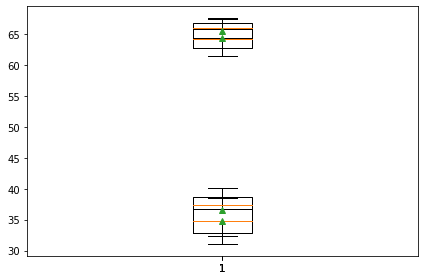

In [143]:
plt.boxplot(capomulin, showmeans=True)
plt.boxplot(ceftamin, showmeans=True)
plt.boxplot(Infubinal, showmeans=True)
plt.boxplot(Ramicane, showmeans=True)
plt.tight_layout()

In [148]:
data = [capomulin, ceftamin, Infubinal, Ramicane]

ValueError: X must have 2 or fewer dimensions

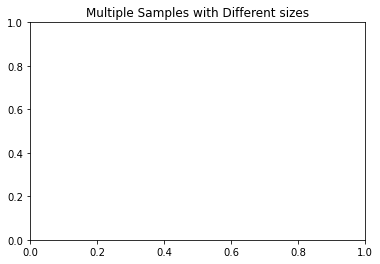

In [147]:
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()

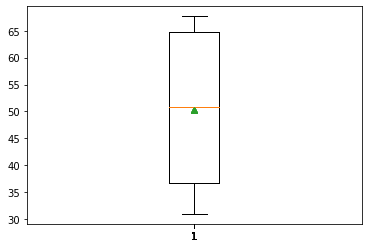

In [119]:
for values in quartiles:
    plt.boxplot(quartiles_df, showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ad41deb90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8ad4302450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ad41de750>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ad4302d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ad430c5d0>],
 'means': [<matplotlib.lines.Line2D at 0x7f8ad430c190>]}

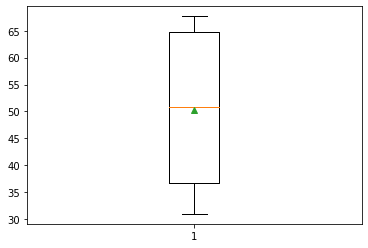

In [106]:
plt.boxplot(quartiles, showmeans=True)

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [149]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [155]:
capomulin_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

In [156]:
capomulin_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [157]:
capomulin_mice = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "s185"]

In [158]:
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


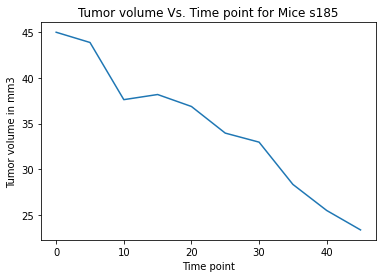

In [177]:
plt.plot(capomulin_mice["Timepoint"], capomulin_mice["Tumor Volume (mm3)"])
plt.title("Tumor volume Vs. Time point for Mice s185")
plt.xlabel("Time point")
plt.ylabel("Tumor volume in mm3")
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [163]:
capomulin_weight = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_weight.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [166]:
capomulin_weight = capomulin_weight.groupby(["Mouse ID"])

In [169]:
mean = capomulin_weight.mean()
mean

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


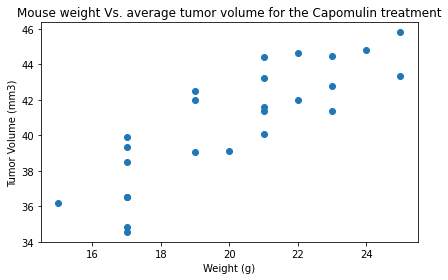

In [175]:
plt.scatter(mean["Weight (g)"], mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight Vs. average tumor volume for the Capomulin treatment")
plt.tight_layout()
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [181]:
correlation = st.pearsonr(mean["Weight (g)"], mean["Tumor Volume (mm3)"])

In [182]:
correlation

(0.8419363424694717, 1.322572243471279e-07)

In [183]:
print(f"The correlation between mice weight and tumor volume is {round(correlation[0],2)}")

The correlation between mice weight and tumor volume is 0.84


In [187]:
from scipy.stats import linregress

/Users/clementboit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


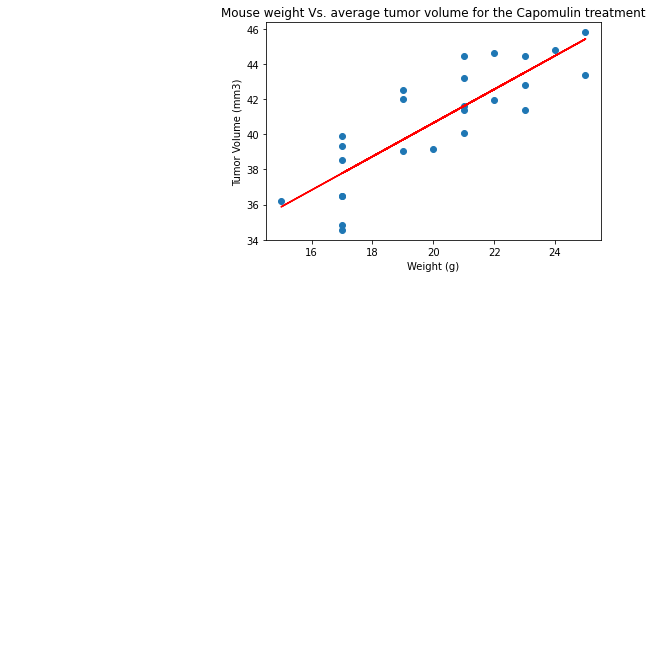

In [189]:
x_values = mean["Weight (g)"]
y_values = mean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight Vs. average tumor volume for the Capomulin treatment")
plt.tight_layout()
plt.show()